<a href="https://colab.research.google.com/github/claret003/pythoncourse/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Pollution and Asthma 

---

This project will explore two seperate datasets, one related to air pollution and the other to asthma prevalence, to test the following hypothesis....

### **'elevated levels of air pollution result in increased asthma prevalence in the general population'.**

Air pollution data has been obtained from the WHO Ambient Air Quality Database
https://whoairquality.shinyapps.io/AmbientAirQualityDatabase/

Asthma prevalence data has been sourced from OWID
https://ourworldindata.org/grapher/asthma-prevalence


For ease of access datasets have been saved on GitHub:

*   **Air pollution dataset** = https://github.com/claret003/pythoncourse/blob/main/WHO_AirQuality_Database_2018.csv

*   **Asthma prevalence dataset** = https://github.com/claret003/pythoncourse/blob/main/asthma-prevalence.csv

This hypothesis will be tested by first conducting exploratory data analysis on both datasets to establish their completeness, data cleaning where required, then combining relevant aspects of each dataset to carry out in-depth analysis aiming to answer specific questions, specifically looking at correlation bewteen these two factors.

*A project title and description (what is interesting and how do you propose to find and present this story.*

*A link to the data set* 

*A set of code cells containing functions that manipulate the data, analyse the data, visualise the data and show correlations and trends*

*Text cells which explain what is being done in each code cell and why*

*Text cells with a summary of the findings from the code*

*A final text cell with a reflection on what has been done, any references (including where the data came from.* 



STEP 1 - 
Importing in the relevant libraries.
Brining the datasets into seperate dataframes.
Carrying out some exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

air_pollution = pd.read_csv('https://raw.githubusercontent.com/claret003/pythoncourse/main/WHO_AirQuality_Database_2018.csv')

asthma_prev = pd.read_csv('https://raw.githubusercontent.com/claret003/pythoncourse/main/asthma-prevalence.csv')

air_pollution.head()


,ID WHO city,iso3,country,city,pm10,Year,type_of_stations,pm10_type,pm25,pm25_type,reference,latitude,longitude,population,wbinc16_text,region,date_compiled,population_source,tempcov_PM10,tempcov_PM25,latitude_pop,longitude_pop,Region2,region_abbr,tempcov_PM10_grad,tempcov_PM25_grad,conc_pm25,color_pm25,conc_pm10,color_pm10
0,3.0,ALB,Albania,Tirana,31.615421,2013,"1 station, traffic, urban",Measured,16.062366,Measured,"European Environment Agency, Air quality e-rep...",41.330269,19.821772,453509.0,Upper middle income,Eur_LM,2016,NaN,NaN,NaN,NaN,NaN,Europe (LMIC),Eur (LMIC),NaN,NaN,15-<25,orange,30-<50,darkred
1,15.0,AUS,Australia,Central Coast,12.820462,2014,-,Converted,5.500000,Measured,http://www.environment.nsw.gov.au/resources/aq...,-33.278889,151.432495,297713.0,High income,Wpr_HI,2016,NaN,NaN,NaN,NaN,NaN,Western Pacific (HIC),Wpr (HIC),NaN,NaN,<10,green,<20,green
2,18.0,AUS,Australia,Devonport,14.918356,2013,-,Converted,6.400000,Measured,Environment Protection Authority,-41.184799,146.345993,29050.0,High income,Wpr_HI,2016,NaN,NaN,NaN,NaN,NaN,Western Pacific (HIC),Wpr (HIC),NaN,NaN,<10,green,<20,green
3,19.0,AUS,Australia,Geelong,17.500000,2014,"1 station, Residential/Light Industry",Measured,7.507530,Converted,"EPA Victoria, Environment Protection Authority...",-38.174999,144.369003,173450.0,High income,Wpr_HI,2016,NaN,NaN,NaN,NaN,NaN,Western Pacific (HIC),Wpr (HIC),NaN,NaN,<10,green,<20,green
4,22.0,AUS,Australia,Hobart,14.219058,2013,-,Converted,6.100000,Measured,Environment Protection Authority,-42.854599,147.315002,170977.0,High income,Wpr_HI,2016,NaN,NaN,NaN,NaN,NaN,Western Pacific (HIC),Wpr (HIC),NaN,NaN,<10,green,<20,green


STEP 2 - Checking shape of datasets. Looking for null values and things that might cause an issue with analysis.

In [2]:
# creating a function to check for null values in dataset
def check_shape(df):
  shape = df.shape
  # rows = 
  nulls = df.isnull().sum() #shows the total number of null values in each column
  print(f'there are {shape[1]} columns in the dataset')
  print(f'there are {shape[0]} rows in the dataset \n')
  print('null values per column: \n')
  print(nulls)

print('Air pollution dataset') 
check_shape(air_pollution)
print('\n')
print('Asthma dataset')
check_shape(asthma_prev)



Air pollution dataset
there are 30 columns in the dataset
there are 11971 rows in the dataset 

null values per column: 

ID WHO city          11090
iso3                     0
country                  0
city                     0
pm10                     0
Year                     0
type_of_stations        68
pm10_type                0
pm25                     0
pm25_type                0
reference               40
latitude                 0
longitude                0
population               0
wbinc16_text             0
region                   0
date_compiled            0
population_source      907
tempcov_PM10          4320
tempcov_PM25          7458
latitude_pop         11961
longitude_pop        11961
Region2                  0
region_abbr              0
tempcov_PM10_grad     4320
tempcov_PM25_grad     7458
conc_pm25                0
color_pm25               0
conc_pm10                0
color_pm10               0
dtype: int64


Asthma dataset
there are 4 columns in the dataset
the

The fields of interest in each dataset are complete - i.e the outputs above indicate that there are no null values in these columns so there is no need to remove null values as doing so would unnecessaarily reduce the size of the dataset for no gain.

The fields of interest are:

Air pollution dataset: **country, pm25, year**

Asthma dataset: **entity, year, prevalence**

'entity' refers to the country, so the column name will be changed to reflect this.

In [3]:
#changing column name. the output confirms that this change has been made

asthma_prev.rename(columns={'Prevalence - Asthma - Sex: Both - Age: Age-standardized (Percent)' : 'prevalence', 'Entity' : 'country'})


,country,Code,Year,prevalence
0,Afghanistan,AFG,1990,6.871359
1,Afghanistan,AFG,1991,6.778874
2,Afghanistan,AFG,1992,6.694809
3,Afghanistan,AFG,1993,6.617201
4,Afghanistan,AFG,1994,6.546920
...,...,...,...,...
6463,Zimbabwe,ZWE,2013,2.924504
6464,Zimbabwe,ZWE,2014,2.938950
6465,Zimbabwe,ZWE,2015,2.953462
6466,Zimbabwe,ZWE,2016,2.967474


STEP 2 - Isolate relevant repoting period for each dataset.

The two datasets have differnt reporting periods. As the hypothesis being tested assumes a link between air pollution and asthma, reporting peiods are being selected on the basis that there is a lag time, i.e. exposure to air pollution is required for a period of time before the onset of asthma, and then its diagnosis.

Based on this assumption, data has been selected to incorporporate a lag of 5 years bewteen the reporting periods of the two dataset. Air pollution reporting period is 2009-2013, and the Asthma prevaence reporting period is 2013 - 2017.
*The validity of this lag time is something that could be investigated further.*

In [59]:
# isolating 2009-2013 air pollution data

def keep_years(df, column_name, start_year,end_year):
  new_df = df[(df[column_name]>=start_year)]
  new_df = new_df[(new_df[column_name]<=end_year)]
  return new_df

air_data = keep_years(air_pollution,"Year",2009,2013)

air_data.describe() #using this to check the max and min year, making sure that it has selected only what I have specified


,ID WHO city,pm10,Year,pm25,latitude,longitude,population,date_compiled,tempcov_PM10,tempcov_PM25,latitude_pop,longitude_pop
count,474.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3.304000e+03,3304.000000,1853.000000,811.000000,1.000000,1.000000
mean,1498.356540,35.025908,2012.538136,20.009787,34.619968,11.267983,4.604410e+05,2017.713075,0.980149,1.028545,34.681667,33.017776
std,675.107112,36.326386,0.871244,17.364901,25.128767,44.113748,1.875943e+06,0.701194,1.415652,2.356234,NaN,NaN
min,3.000000,3.414147,2009.000000,1.420602,-46.413185,-123.163330,6.000000e+00,2016.000000,0.013699,0.152854,34.681667,33.017776
25%,1207.250000,18.699600,2012.000000,11.750177,31.839295,-0.233333,1.148475e+04,2018.000000,0.931507,0.928767,34.681667,33.017776
50%,1537.000000,23.606363,2013.000000,15.306579,45.370477,8.840091,4.276900e+04,2018.000000,0.972603,0.967466,34.681667,33.017776
75%,1888.750000,35.213722,2013.000000,21.423682,49.329654,18.417867,1.952832e+05,2018.000000,0.992808,0.991781,34.681667,33.017776
max,2978.000000,540.000000,2013.000000,216.620000,69.667910,176.918625,2.570317e+07,2018.000000,61.750000,68.000000,34.681667,33.017776


In [60]:
# isolating 2013 - 2017 asthma prevalence data by calling the function defined above

asthma_data = keep_years(asthma_prev,"Year",2013,2017)

#running a test to check if the years were correctly isolated

if asthma_data['Year'].min() == 2013 and asthma_data['Year'].max() ==2017:
  print ("test passed! years successfully isolated")
else:
  print("somthing went wrong, ceck the code again")

test passed! years successfully isolated


The code blocoks above use two differnt ways of assessing whether the correct date range as been isolated. One by looking at the description output and manually cheking the min and max dates, the second using a test to verify that the correct date range was selected.

**STEP 3 - Group the datasets by country to create a country mean for air pollution rate and asthma prevalence, calculated over a five year period.**

In [61]:
#air pollution data

air_data_by_country = air_data[["country", "pm25"]].groupby("country").mean()

air_data_by_country.head()


,pm25
country,
Albania,16.062366
Andorra,18.320474
Australia,7.851019
Austria,14.866206
Bahrain,54.606000


In [62]:
#asthma prevaence data
# asthma_data.columns
asthma_data_by_country = asthma_data[["Entity", "Prevalence - Asthma - Sex: Both - Age: Age-standardized (Percent)"]].groupby("Entity").mean()
asthma_data_by_country = asthma_data_by_country.rename(columns={'Prevalence - Asthma - Sex: Both - Age: Age-standardized (Percent)' :'prevalence'})

asthma_data_by_country.head()

,prevalence
Entity,
Afghanistan,6.310381
Albania,2.888694
Algeria,5.925728
American Samoa,11.126043
Andean Latin America,5.244629


**STEP 4 - checking the shape of the new dataframes. Need to know if they have the same number of countries before anything is merged.**

In [63]:
air_data_by_country.count(axis = 'columns')

country
Albania                              1
Andorra                              1
Australia                            1
Austria                              1
Bahrain                              1
                                    ..
United Arab Emirates                 1
United Kingdom                       1
United Republic of Tanzania          1
Venezuela, Bolivarian Republic of    1
Viet Nam                             1
Length: 83, dtype: int64

In [64]:
asthma_data_by_country.count(axis = 'columns')

Entity
Afghanistan                   1
Albania                       1
Algeria                       1
American Samoa                1
Andean Latin America          1
                             ..
Western Sub-Saharan Africa    1
World                         1
Yemen                         1
Zambia                        1
Zimbabwe                      1
Length: 231, dtype: int64

This shows that the air pollution dataset has 83 countries and the asthma prevalence dataset has 231 countries. Only those countires where both peices of data are available will help test the hypothesis.

**STEP 5 - Create a new dataframe that will house all the relevant data for testing the hypothesis.**

Copy the air_data dataframe and pull over the relevant asthma prevalence data from the other dataset where the countries match.  

Note that the column 'country' in combined_data is converted to 'Entity' before the merge so that there is a familiar column on which to base the merger.


In [101]:
#creating a new dataframe which will hold all relevant info for  assessing correlation

combined_data = air_data_by_country.copy()
combined_data = combined_data.rename(columns={'country' : 'Entity'})

combined_data = pd.merge(combined_data, 
                      asthma_data_by_country, 
                      on ='Entity', 
                      how ='inner')

combined_data


,Entity,pm25,prevalence
0,Albania,16.062366,2.888694
1,Andorra,18.320474,6.591577
2,Australia,7.851019,10.178175
3,Austria,14.866206,5.368935
4,Bahrain,54.606000,5.303252
...,...,...,...
72,Tunisia,33.278544,4.682876
73,Turkey,43.997173,4.935698
74,Uganda,104.300000,4.547965
75,United Arab Emirates,59.721099,7.871211


The air pollution and asthma prevalence data is now held togther in the combined_data dataframe. The output shows that there are now only 77 lines. This is because only 77 of the countries for which air pollution data is available also have asthma prevalence data.

Some high level stats associated with the dataset a listed below:

In [122]:
import matplotlib.pyplot as plt

max = round(combined_data['pm25'].max(),2)
mean = round(combined_data['pm25'].mean(),2)
min = round(combined_data['pm25'].min(),2)

print('Air pollution rates across 77 countries from 2009 - 2013')
print(f' the maximum pollution level is {max} micrograms per cubic meter (μg/m3)')
print(f' the minimum pollution level is {min} micrograms per cubic meter (μg/m3)')
print(f' the mean pollution level is {mean} micrograms per cubic meter (μg/m3) \n')

max = round(combined_data['prevalence'].max(),2)
mean = round(combined_data['prevalence'].mean(),2)
min = round(combined_data['prevalence'].min(),2)

print('Asthma prevalence rates across 77 countries from 2013 - 2017')
print(f' the maximum asthma prevalence is {max} % adult popultaion')
print(f' the minimum asthma prevalence is {min} % adult popultaion')
print(f' the mean asthma prevalence is {mean} % adult popultaion')

Air pollution rates across 77 countries from 2009 - 2013
 the maximum pollution level is 107.33 micrograms per cubic meter (μg/m3)
 the minimum pollution level is 6.18 micrograms per cubic meter (μg/m3)
 the mean pollution level is 28.77 micrograms per cubic meter (μg/m3) 

Asthma prevalence rates across 77 countries from 2013 - 2017
 the maximum asthma prevalence is 10.18 % adult popultaion
 the minimum asthma prevalence is 2.07 % adult popultaion
 the mean asthma prevalence is 4.96 % adult popultaion


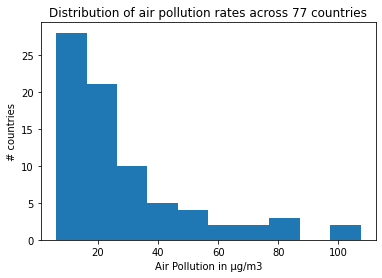

In [126]:
plt.hist(combined_data['pm25']) 
plt.title("Distribution of air pollution rates across 77 countries")
plt.xlabel("Air Pollution in μg/m3")
plt.ylabel("# countries")
plt.show()

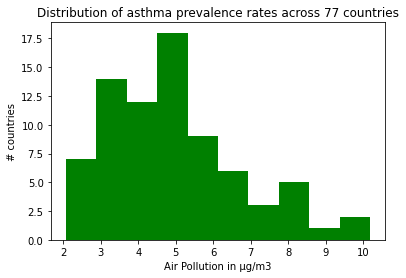

In [128]:
plt.hist(combined_data['prevalence'], color = "green") 
plt.title("Distribution of asthma prevalence rates across 77 countries")
plt.xlabel("Air Pollution in μg/m3")
plt.ylabel("# countries")
plt.show()

**STEP 6 - Assess the relationship between the two variables.**

Using visualisations to display correlation

Calculating the correlation coefficient

In [129]:
# regression - correlaation calc

from scipy.stats import linregress

x = combined_data['pm25']
y = combined_data['prevalence']

regression = (linregress(x,y))
print(regression)
print(regression.slope)
print(regression.intercept)
print(regression.rvalue)

LinregressResult(slope=-0.03058551415283755, intercept=5.840802893090864, rvalue=-0.38961703056786234, pvalue=0.00046100844097412446, stderr=0.008348260446391588)
-0.03058551415283755
5.840802893090864
-0.38961703056786234


These results show that there is actually only a very weak neagtive correaltion (-0.39) between air pollution levels and asthma prevalence rates. Interestingly, the slope intercept is at 5.8%, which suggests that this is a 'baseline' level of asthma prevalence expected amongst any population similar to those captured in this dataset.

Additionally, the very low p values suggests that this model is not one that could confidently be used for prediction.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


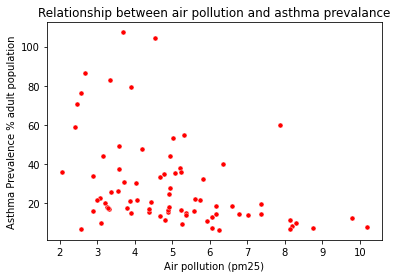

In [144]:
#creating a scatter plot using Seaborn

sns.scatterplot(combined_data['prevalence'], combined_data['pm25'], color = "red", s =25)

plt.title('Relationship between air pollution and asthma prevalance')
plt.xlabel('Air pollution (pm25)')
plt.ylabel('Asthma Prevalence % adult population');


